<a href="https://colab.research.google.com/github/Anidafio/4105_hw1/blob/main/problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use the URL for the raw CSV data
url = 'https://raw.githubusercontent.com/Anidafio/4105_hw1/main/D3.csv'

data = pd.read_csv(url)

In [44]:
# Separate features and labels
X1 = data.values[:, 0]  # get input values from first column -- X is a list here
X2 = data.values[:, 1]
X3 = data.values[:, 2]
y = data.values[:, 3] # get output values from second column -- Y is the list here
m = len(y)  # Number of training examples
n = len(X1)  # Number of training examples

In [45]:
def compute_cost(X, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [46]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [47]:
X_0 = np.ones((m, 1))
X_1 = X1.reshape(m, 1)
X = np.hstack((X_0, X_1)) # X1 explanatory feature matrix
X_1 = X2.reshape(m, 1)
X = np.hstack((X, X_1)) # X2 explanatory feature matrix
X_1 = X3.reshape(m, 1)
X = np.hstack((X, X_1)) # X3 explanatory feature matrix

iterations = 1500
alpha = 0.1

Final value of theta = [ 5.31416563 -2.00371905  0.53256359 -0.26560164]
cost_history = [4.13064348 3.51770697 3.12758306 ... 0.73846424 0.73846424 0.73846424]
cost_history average = 0.7908215051106281


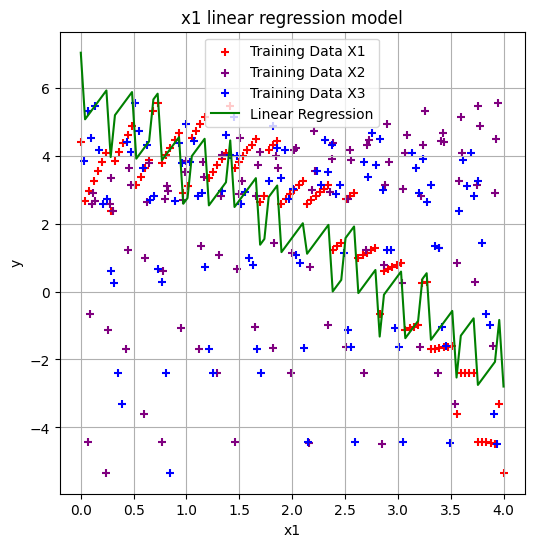

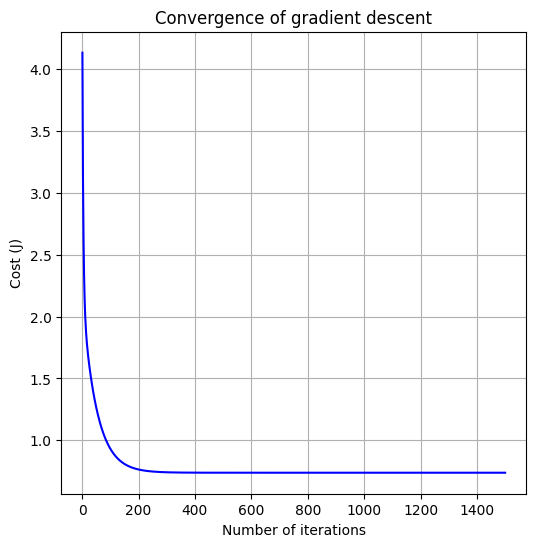

In [48]:
#training for explanatory variables x1
theta = [0., 0., 0., 0.]
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)
print('cost_history average =', np.mean(cost_history))

plt.scatter(X1, y, color='red', marker='+', label='Training Data X1')
plt.scatter(X2, y, color='purple', marker='+', label='Training Data X2')
plt.scatter(X3, y, color='blue', marker='+', label='Training Data X3')

# Line plot for the linear regression model
plt.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (6, 6)
plt.grid(True)
plt.legend()

plt.xlabel('x1')
plt.ylabel('y')
plt.title('x1 linear regression model')

plt.show()

#loss over the iteration plot
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (6, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

plt.show()